<a href="https://colab.research.google.com/github/Lenalex45/MachineLearningTD1/blob/main/TP2_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

In [ ]:
LOAD THE DATA

In [1]:
#only for google colab

from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [6]:
#open the file as a DataFrame

df = pd.read_csv('heart.csv', delimiter=',')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

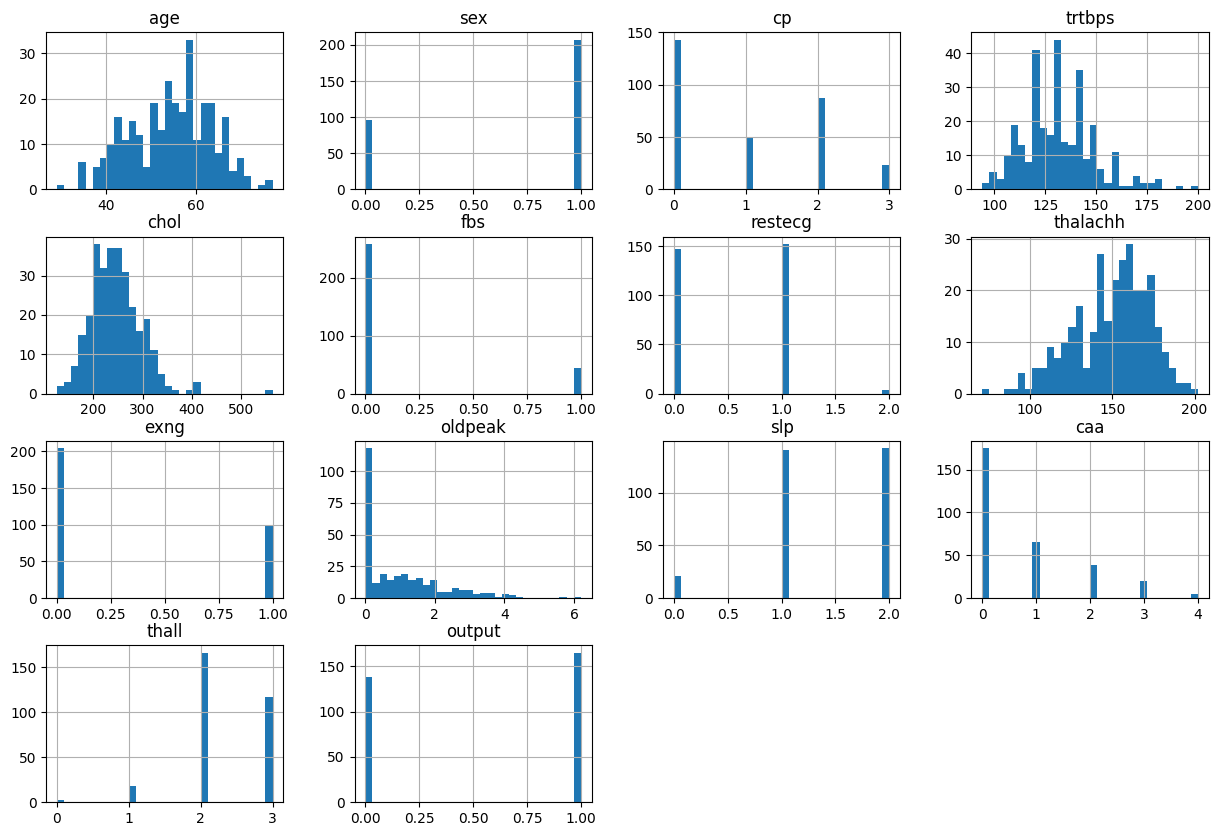

In [10]:
#idea of histograms to visualize the distribution of all features (and stress level) at once
#no absurd point found for any of the feature from the histograms
#idea in case of excessively high or low values: define a range and drop all rows outside of the range for each feature

df.hist(bins=30, figsize=(15, 10))

In [9]:
#Check for any missing or null values in the dataset 
#the nb seen here corresponds to the nb of missing value in each column
#No Null value found for any feature -> idea to erase the row in case of null value: dropna() function

df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<Axes: >

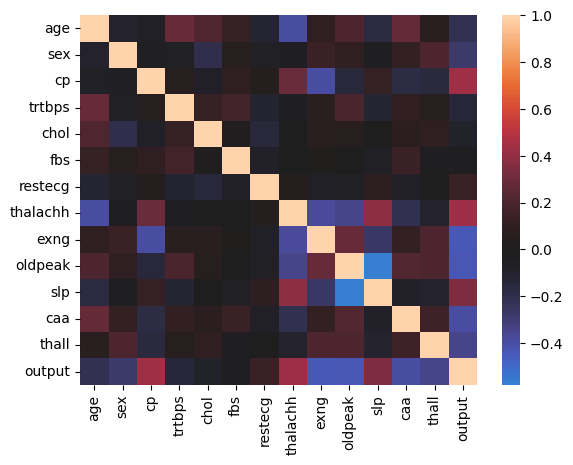

In [14]:
#check feature importance
#we could get rid of the feature with a 0 correlation 

sns.heatmap(df.corr(), center=0)

In [27]:
X = df[['age', 'sex','cp','trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
y = df[['output']]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) #fit to the shape of X, then transform
X_test = scaler.transform(X_test)

import numpy as np
y_train = np.ravel(y_train)

In [ ]:
# Attempt to visualize -> Not working
plt.scatter(X[:, 0], X[:, 1], c=[colors[c] for c in y])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Classifier')

handles = [plt.scatter([], [], c=colors[c], label='Class {}'.format(c)) for c in colors]
plt.legend(handles=handles)

plt.show()

In [38]:
from sklearn import svm

svm_classifier = svm.SVC(kernel='linear', C=1)
svm_classifier.fit(X, y)
y_pred = svm_classifier.predict(X_test)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
#evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
svm_classifier_score = svm_classifier.score(X_test,y_test) #mean accuracy
print(svm_classifier_score)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8688524590163934
[[21  6]
 [ 2 32]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.84      0.94      0.89        34

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



In [37]:
#change parameters manualy
svm.SVC(kernel='poly',C=10)

SVC(C=10, kernel='poly')

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1,10,100,1000],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
grid_search = GridSearchCV(svm_classifier, param_grid,cv=5)
grid_search.fit(X_train, y_train)

In [51]:
print("Best Hyperparameters: ", grid_search.best_params_)
print("Training Score: ", grid_search.best_score_)
print("Test Score: ", grid_search.score(X_test,y_test))

Best Hyperparameters:  {'C': 0.1, 'kernel': 'linear'}
Training Score:  0.8225340136054422
Test Score:  0.8360655737704918


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(svm_classifier, param_distributions=param_grid, cv=5, n_iter=20, random_state=42)
random_search.fit(X_train, y_train)
print("Best Hyperparameters: ", random_search.best_params_)
print("Training Score: ", random_search.best_score_)
print("Test Score: ", random_search.score(X_test,y_test))

#same results as with grid search -> Best Hyperparameters:  {'kernel': 'linear', 'C': 0.1}

In [ ]:
#last step -> not working

models_with_parameters = {
    svm.SVC(): {'C': [0.1,1,10,100,1000],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
}

grid = GridSearchCV(models_with_parameters, param_grid, cv=5)
grid.fit(X_train, y_train)
grid.best_estimator_